# Домашнее задание № 3 Построение заявочной скоринговой модели
**Общая информация:**
- ⚡Дата выдачи: 14 марта 2023
- ⏰ Мягкий дедлайн 23:59MSK 27.03.2023
- ⏰ Жесткий дедлайн 23:59MSK 30.03.2023
- ✍ работы должны быть высланы на почту maria.vorobyova.ser@gmail.com с темой HSE_CS_[направление]_ФИО, например HSE_CS_ПАД_ИВАНОВ_ИВАН_ИВАНОВИЧ

**Оценивание и штрафы:**

Максимальный балл за работу — 10 баллов. За каждый день просрочки снимается 1 балл. После жесткого дедлайна сдача невозможна. 

Задание должно быть выполнено самостоятельно, «похожие» решения будут рассмотрены как "плагиат" и все похожие работы будут оценены баллом 0.

_Оценка будет снижена, если_ 
- нет комментариев 
- код написан плохо, непонятно
- сделаны неверные выводы

**Что нужно сделать?**

Необходимо построить модель, оценивающую вероятность дефолта клиента на стадии заведения кредитной заявки. Идти нужно строго по ноутбуку и выполнять задания каждого блока.

Перед началом выполнения работы необходимо скачать 2 датасета:
 - Данные с одобренными кредитными заявками [датасет](https://drive.google.com/file/d/1YUEMYCmvLs786AyIUV4l4NZg6k4Sb1cj/view?usp=share_link)
 - Данные с отказанными кредитными заявками [датасет](https://drive.google.com/file/d/1Q1YS4HKJVkTkIRTQsxSzutuKiM5mxUqx/view?usp=share_link)

Описание датасета:

1. target - целевая переменная (1- клиент достиг просрочку 90 дней в первый год кредита, 0 - иначе)
2. INCOME_TYPE - тип подтверждения дохода                
3. EDUCATION_  -  образование               
4. CUSTOMER_CATEGORY_  - категория клиента         
5. income   - доход клиента                  
6. DEPENDANT_NUMBER   - количество иждевенцев         
7. IS_EMPL    - это сотрудник банка                  
8. COUNT_ACTIVE_CREDIT_NO_CC  - количество октрытых кредитов без учета кредитных карт
9. CNT_MNTH_FROM_LAST_PMNT    - сколько месяцев прошло с момента последнего платежа по предудущему кредиту
10. age  - возраст клиента                     
11. experience  - стаж клиента               
12. inquiry_14_day   - количество запросов в бюро кредитных историй за последние 14 дней          
13. inquiry_21_day   - количество запросов в бюро кредитных историй за последние 21 день                  
14. count_mnth_act_passport - сколько месяцев прошло с момента выдачи выдачи паспорта     
15. UID  - ID заявки    

Желаем вам удачи!✌

Ссылка на слайды [семинара](https://drive.google.com/file/d/18ox08w_016lopYZYu248Z6HHcYytsvus/view?usp=sharing) 

In [1]:
# import библиотек
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# чтобы отобразить больше столбцов и строк
# pd.options.display.max_rows = 50
pd.options.display.max_columns = 200

import warnings
warnings.filterwarnings('error')

# для работы с датами, временем
from datetime import timedelta
import datetime as dt

# для построения графиков
import matplotlib.pyplot as plt
# %matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]
import seaborn as sns

In [2]:
# считать данные
df_accept = pd.read_csv('accept.csv')
df_reject = pd.read_csv('reject.csv')

# Explatory Data Analysis. Максимально - 2 балла

- 0 баллов, если задание не выполнено
- 1 балл, если посчитаны статистики,есть какие-то графики (важно, ПОЛЕЗНЫЕ графики), но не сделаны выводы
- 2 балла, если посчитаны статистики и есть графики (важно, ПОЛЕЗНЫЕ графики) и сделаны ВЫВОДЫ (важно, что выводы правильные)

In [3]:
df_accept.head()

,target,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,UID
0,0,2NDFL,elementary,NaN,56245.0,0.0,0,NaN,NaN,50.567123,2.131507,NaN,NaN,5.536986,10
1,0,OTHER,elementary,Corporate,119510.0,0.0,1,1.0,1.115569,28.191781,2.032877,1.0,1.0,8.109589,11
2,0,2NDFL,advanced,NaN,12020.0,0.0,0,1.0,0.303786,36.437742,17.731507,0.0,0.0,9.123535,13
3,0,OTHER,advanced,Corporate,21611.0,0.0,1,NaN,NaN,33.333446,1.711528,NaN,NaN,7.972678,15
4,0,OTHER,elementary,VIP,146841.0,0.0,1,0.0,30.530914,36.531073,0.577648,0.0,0.0,7.737705,17


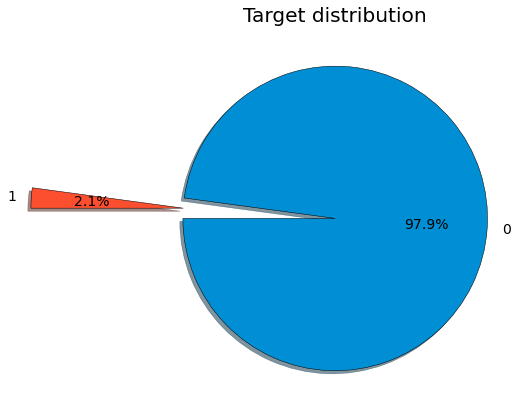

In [4]:
plt.figure(figsize=(8,6))
plt.style.use('fivethirtyeight')

slices = df_accept.target.value_counts()
labels = df_accept.target.value_counts().reset_index()['index']
explode = df_accept.target.value_counts().reset_index()['index']

plt.pie(slices,
        labels=labels,
        explode=explode, 
        shadow=True,
        startangle=180, 
        autopct='%1.1f%%',
        wedgeprops={'edgecolor':'black'}
        )


plt.title('Target distribution')
plt.tight_layout()

plt.show()

In [5]:
numeric_columns_a = df_accept.select_dtypes(include=['int','float']).columns
categorical_columns_a = df_accept.select_dtypes(include=['object','bool','category']).columns

print("Number of numerical columns:", len(numeric_columns_a))
print("Number of categorical columns:", len(categorical_columns_a))
print("Total number of columns in the feature dataframe:", df_accept.shape[1])

Number of numerical columns: 12
Number of categorical columns: 3
Total number of columns in the feature dataframe: 15


In [6]:
numeric_columns_a

Index(['target', 'income', 'DEPENDANT_NUMBER', 'IS_EMPL',
       'COUNT_ACTIVE_CREDIT_NO_CC', 'CNT_MNTH_FROM_LAST_PMNT', 'age',
       'experience', 'inquiry_14_day', 'inquiry_21_day',
       'count_mnth_act_passport', 'UID'],
      dtype='object')

In [7]:
numeric_columns_r = df_reject.select_dtypes(include=['int','float']).columns
categorical_columns_r = df_reject.select_dtypes(include=['object','bool','category']).columns

print("Number of numerical columns:", len(numeric_columns_r))
print("Number of categorical columns:", len(categorical_columns_r))
print("Total number of columns in the feature dataframe:", df_reject.shape[1])

Number of numerical columns: 11
Number of categorical columns: 3
Total number of columns in the feature dataframe: 14


In [8]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values * 100
    summ['%missing'] = df.isnull().sum().values / len(df)
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values
    
    return summ

In [9]:
summary(df_accept[numeric_columns_a])

data shape: (32554, 12)


,data type,#missing,%missing,#unique,min,max,first value,second value,third value
target,int64,0,0.000000,2,0.000000,1.000000e+00,0.000000,0.000000,0.000000
income,float64,65300,0.020059,18350,0.000000,1.145038e+07,56245.000000,119510.000000,12020.000000
DEPENDANT_NUMBER,float64,4000,0.001229,5,0.000000,4.000000e+00,0.000000,0.000000,0.000000
IS_EMPL,int64,0,0.000000,2,0.000000,1.000000e+00,0.000000,1.000000,0.000000
COUNT_ACTIVE_CREDIT_NO_CC,float64,836400,0.256927,9,0.000000,8.000000e+00,NaN,1.000000,1.000000
CNT_MNTH_FROM_LAST_PMNT,float64,1014500,0.311636,17259,-66.559028,1.365277e+03,NaN,1.115569,0.303786
age,float64,0,0.000000,24297,25.000187,6.232055e+01,50.567123,28.191781,36.437742
experience,float64,4700,0.001444,21225,-157.184939,1.011924e+02,2.131507,2.032877,17.731507
inquiry_14_day,float64,922100,0.283252,7,0.000000,6.000000e+00,NaN,1.000000,0.000000
inquiry_21_day,float64,922100,0.283252,9,0.000000,8.000000e+00,NaN,1.000000,0.000000


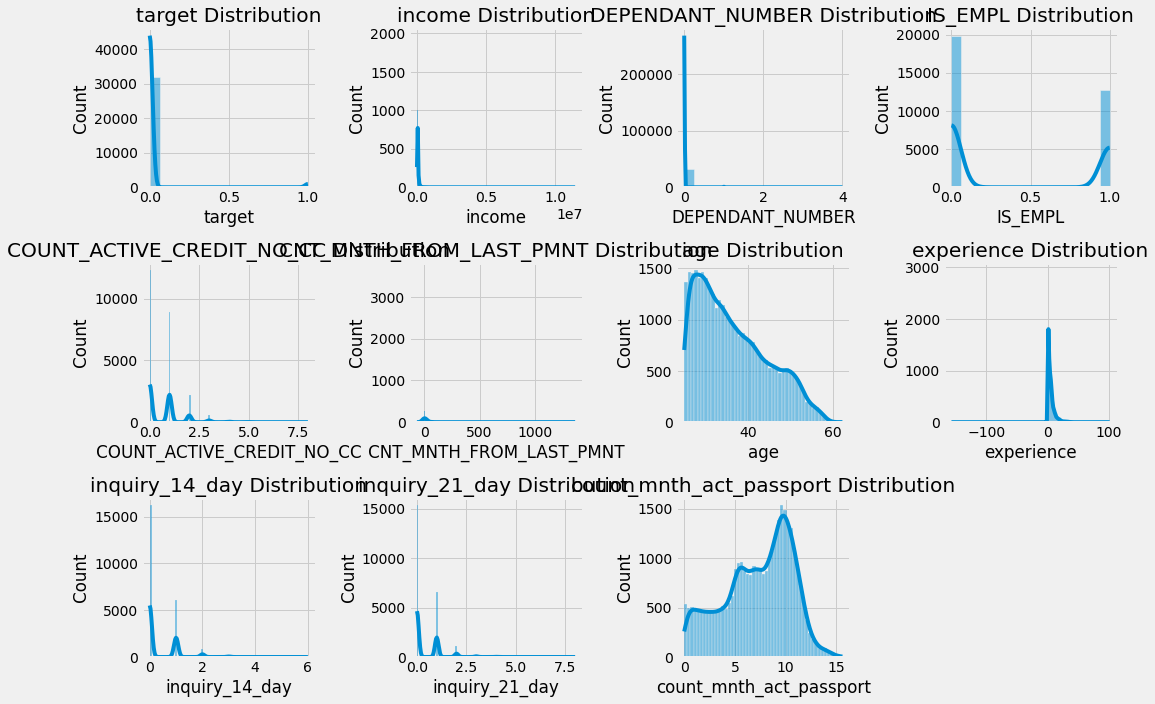

In [10]:
plt.figure(figsize=(15,10))
for id,column in enumerate(numeric_columns_a[:-1]):
    plt.subplot(3,4,id+1)
    sns.histplot(x=column,data=df_accept, kde=True)
    plt.title(f"{column} Distribution")
    plt.tight_layout()

In [11]:
# сколько в выборке "accept" 0 и 1
df_accept.target.value_counts()

0    31857
1      697
Name: target, dtype: int64

In [12]:
df_accept.target.value_counts()[1] / len(df_accept.target) * 100

2.141057934508816

In [13]:
def get_interval_analytics(df):
    df = df[numeric_columns_r]
    missing = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mean = df.mean(axis=0).apply(lambda x: '%.3f' % x)
    median = df.median(axis=0).apply(lambda x: '%.3f' % x)
    std = df.std(axis=0)
    an_table = pd.concat([mis_val_percent, median, mean, std], axis=1)
    an_table = an_table.rename(
    columns = {0: 'Доля пропущенных значений (в процентах)', 
               1 : 'Медиана', 
               2 : 'Среднее значение', 
               3 : 'Среднеквадратическое отклонение'})
    
    return an_table

In [14]:
get_interval_analytics(df_accept)

,Доля пропущенных значений (в процентах),Медиана,Среднее значение,Среднеквадратическое отклонение
income,2.005898,41463.000,61331.771,106932.972771
DEPENDANT_NUMBER,0.122873,0.000,0.006,0.096019
IS_EMPL,0.000000,0.000,0.390,0.487792
COUNT_ACTIVE_CREDIT_NO_CC,25.692695,0.000,0.662,0.835298
CNT_MNTH_FROM_LAST_PMNT,31.163605,0.928,20.857,143.422108
age,0.000000,34.734,36.432,8.219484
experience,0.144375,3.279,4.890,5.344778
inquiry_14_day,28.325244,0.000,0.362,0.611643
inquiry_21_day,28.325244,0.000,0.426,0.685549
count_mnth_act_passport,0.000000,7.781,7.250,3.341657


In [15]:
get_interval_analytics(df_reject)

,Доля пропущенных значений (в процентах),Медиана,Среднее значение,Среднеквадратическое отклонение
income,5.106144,29115.000,33651.243,21821.837966
DEPENDANT_NUMBER,0.046760,0.000,0.002,0.046357
IS_EMPL,0.000000,1.000,0.543,0.498149
COUNT_ACTIVE_CREDIT_NO_CC,41.223230,0.000,0.541,0.730867
CNT_MNTH_FROM_LAST_PMNT,51.126905,0.865,42.478,228.831924
age,0.000000,24.109,24.037,0.738261
experience,0.074815,1.226,1.660,1.394135
inquiry_14_day,43.056205,0.000,0.341,0.619647
inquiry_21_day,43.056205,0.000,0.414,0.708179
count_mnth_act_passport,0.000000,3.713,3.509,1.154384


In [16]:
def get_categorical_analytics(df):
    df = df[categorical_columns_r]
    missing = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mode = df.mode(axis=0).T.rename(columns={0: "1"})
    an_table = pd.concat([mode, mis_val_percent], axis=1)
    an_table = an_table.rename(
    columns = {0 : 'Доля пропущенных значений (в процентах)',
               "1": 'Мода'})
    return an_table

In [17]:
get_categorical_analytics(df_accept)

,Мода,Доля пропущенных значений (в процентах)
INCOME_TYPE,OTHER,0.000000
EDUCATION_,elementary,0.000000
CUSTOMER_CATEGORY_,Corporate,59.774528


In [18]:
get_categorical_analytics(df_reject)

,Мода,Доля пропущенных значений (в процентах)
INCOME_TYPE,OTHER,0.000000
EDUCATION_,elementary,0.000000
CUSTOMER_CATEGORY_,Corporate,47.152343


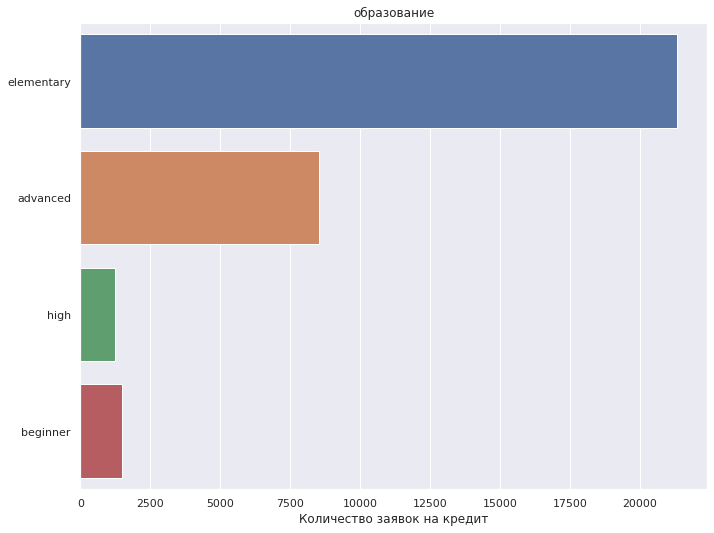

In [19]:
sns.set()
fig, ax = plt.subplots()
ax = sns.countplot(y='EDUCATION_', data=df_accept)
ax.set_title('образование')
ax.set_ylabel('')
ax.set(xlabel='Количество заявок на кредит')

plt.show()

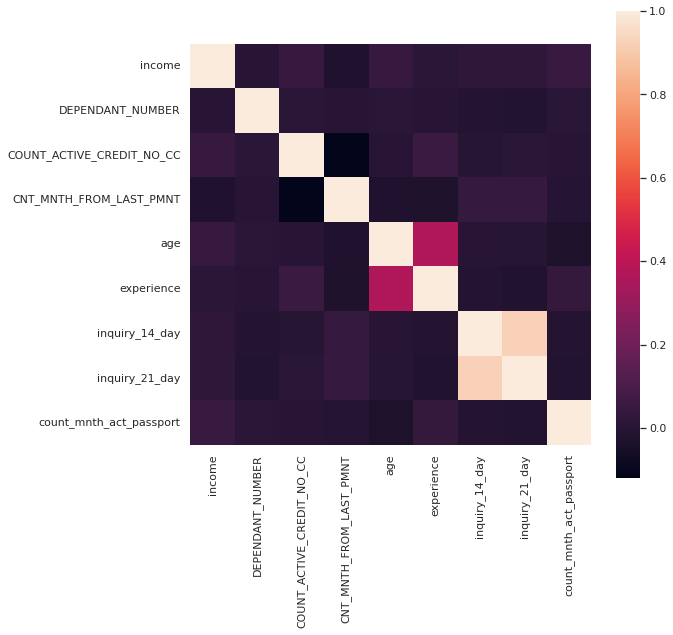

In [20]:
# матрица корреляций
correlations = df_accept.select_dtypes(include=['float64']).corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlations, square=True)

plt.show()

# Создание дополнительных переменных. Максимально - 1 балл

Будьте креативными, чем больше переменных, тем больше балл! При этом переменные должны быть логичными, нелогичные переменные не принимаются

- 0 баллов, если задание не выполнено
- 0.5 баллов - создана 2 дополнительные переменные 
- 1 балл создано больше 3 переменных 


In [21]:
# преобразование WOE
def calculate_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    return iv

In [22]:
def calculate_woe(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    dset = dset.sort_values(by='WoE')
    
    return dset

In [23]:
# преобразование WOE
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [24]:
# делим интервальные переменные на бины
for feature in numeric_columns_r:
    df_accept[feature + '_bin'] = pd.qcut(df_accept[feature], 5, duplicates='drop')
    df_accept[feature + '_bin'] = df_accept[feature + '_bin'].cat.add_categories("0-0").fillna("0-0")

for feature in numeric_columns_r:
    df_accept[feature] = df_accept[feature].fillna("0-0") 

# Построение модели на одобренных заявках. Максимально - 4 балла
Необхоимо построить логистическую регрессию на WoE переменных. 

Если построена любая другая модель, балл = 0

In [25]:
# Помним про разбиение данных на тест и трейн
from sklearn.model_selection import train_test_split
train, test, y_train, y_test = train_test_split(df_accept, 
                                                df_accept['target'],
                                                test_size=0.2, 
                                                random_state=42, 
                                                stratify=(df_accept['target']))

Необходимо расчитать WoE преобразование - максимально - 3 балла



Расчет WoE должен быть в 2 этапа:

1 шаг. Fine Classing (1 балл). Разбиение на большое количество бинов(интервалов)
  - обычно интервальные переменные делят по  20, 30 и так далее интервалов
  - для категориальных переменных - одна категория - одна группа
  - далее для каждой группы рассчитываем WoE

2 шаг. Coarse classing (2 балла). Укрупнение интервалов, которые получены на 1-ом шаге. В итоге должно получится не больше 5-10 интервалов. 
  - Обычно объединяют группы с похожими значениями WoE 
  - WoE должен быть монотонным, то есть после вашего объединения результат должен быть интерпретируемым (необходимо продемонстрировать графически, что WoE монотонен )



In [26]:
scorecard = pd.DataFrame()

In [27]:
# WOE - преобразование + IV для предыдущего вопроса
for feature in numeric_columns_r:
    df, iv = calculate_woe_iv(train, feature + '_bin', 'target')
    df['feature'] = feature
    train = train.merge(df[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value' )
    train = train.rename(columns={'WoE':'WoE'+'_'+feature})
    train = train.drop(columns = [feature, feature + '_bin', 'Value'])
    test = test.merge(df[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value' )
    test = test.rename(columns={'WoE':'WoE'+'_'+feature})
    test = test.drop(columns = [feature, feature + '_bin', 'Value'])
    scorecard = pd.concat([scorecard, df[['feature', 'Value', 'WoE']]])    
    
    print('feature', feature, 'IV =',iv)

feature income IV = 0.11913341711188855
feature DEPENDANT_NUMBER IV = 0.36126520135703916
feature IS_EMPL IV = 0.0
feature COUNT_ACTIVE_CREDIT_NO_CC IV = 0.11391611667523456
feature CNT_MNTH_FROM_LAST_PMNT IV = 0.11084907225149529
feature age IV = 0.007853004549521248
feature experience IV = 0.48630993405066264
feature inquiry_14_day IV = 0.13591538228152636
feature inquiry_21_day IV = 0.13106722063919957
feature count_mnth_act_passport IV = 0.03777099452446936
feature UID IV = 0.05013085779153364


In [28]:
# WOE - преобразование + IV для предыдущего вопроса
for feature in categorical_columns_r:
    df, iv = calculate_woe_iv(train, feature , 'target')
    df['feature'] = feature
    train = train.merge(df[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    train = train.rename(columns={'WoE':'WoE'+'_'+feature})
    train = train.drop(columns = [feature, 'Value'])
    test = test.merge(df[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    test = test.rename(columns={'WoE':'WoE'+'_'+feature})
    test = test.drop(columns = [feature, 'Value'])
    scorecard = pd.concat([scorecard, df[['feature', 'Value', 'WoE']]])
   
    print('feature', feature, 'IV =',iv)

feature INCOME_TYPE IV = 0.014159279223568546
feature EDUCATION_ IV = 0.024940573762550818
feature CUSTOMER_CATEGORY_ IV = 0.0


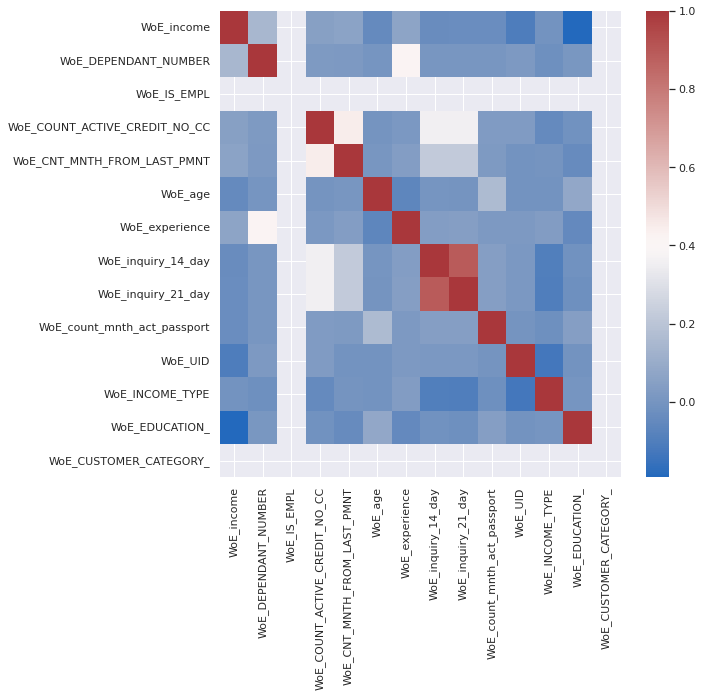

In [29]:
# матрица корреляций для корреляционного анализа
correlations_woe = train.select_dtypes(include=['float64']).corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlations_woe, cmap = "vlag")
plt.show()

In [30]:
features = test.columns.tolist()
# не предикторы
features.remove('target')

# исключаем, так как IV<0.02
features.remove('WoE_age')
features.remove('WoE_INCOME_TYPE')
features.remove('WoE_CUSTOMER_CATEGORY_')

# исключим inquiry_14_day, так inquiry_14_day коррелирует с inquiry_21_day,
# при этом IV у inquiry_21_day выше
features.remove('WoE_inquiry_14_day')

features

['WoE_income',
 'WoE_DEPENDANT_NUMBER',
 'WoE_IS_EMPL',
 'WoE_COUNT_ACTIVE_CREDIT_NO_CC',
 'WoE_CNT_MNTH_FROM_LAST_PMNT',
 'WoE_experience',
 'WoE_inquiry_21_day',
 'WoE_count_mnth_act_passport',
 'WoE_UID',
 'WoE_EDUCATION_']

построение и оценка логистической регресии - максимально 1 балл
- построена только логистическая регрессия - 0.3 балла
- сделана оценка модели ( roc auc, f1, и так далее) - 0.3 балла
- построена скоркарта - 0.4 балла

Напомню, что для скоркарты нужны следующие формулы (детали в лекции и семинаре)

Score_i =  (βi × WoE_i + α/n) × Factor + Offset/n, где

- Factor = pdo/ln(2)

- Offset = Target Score — (Factor × ln(Target Odds))

In [31]:
train = train.dropna()
test = test.dropna()

X_train = train[features]
X_test = test[features]
y_train = train['target']
y_test = test['target']

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg.score(X_test, y_test)

0.9943842759727236

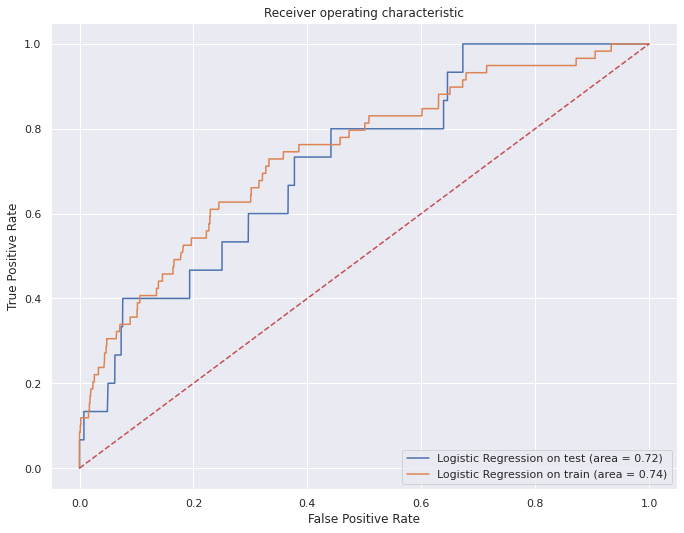

In [33]:
plt.rc("font", size=14)
logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
logit_roc_auc_train = roc_auc_score(y_train, logreg.predict_proba(X_train)[:,1])
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression on test (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr_train, tpr_train, label='Logistic Regression on train (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [34]:
2*roc_auc_score(y_test, logreg.predict(X_test)) - 1

0.06666666666666665

In [35]:
# рассчёт F1
f1_score(y_test, logreg.predict(X_test), zero_division=1)

0.125

In [36]:
# смотрим коэффициенты и биас
print(logreg.coef_, logreg.intercept_)

[[-0.90040042 -0.7418072   0.         -0.98392376 -0.23551352 -0.25517921
  -0.85412652 -0.95175391 -1.30220791 -1.56132215]] [-5.10099525]


# Reject Inference (Анализ отклоненных заявок). Максимально -  3 балла
- проведен анализ отклоненых заявок и сравнение с одобренными заявками - 0.2 балла
- проведена разметка отклоненных заявок одним методом (метод можно взять либо из семинара/лекции или любой другой логичный метод, просто всем ставить 1 - нельзя) - 1 балл
- построена общая логистическая регрессия с WoE переменными на одобренных и отказанных заявках - 1 балл
- построена скоркарта - 0.3 балла
- сделан вывод и даны рекомендации какую модель внедрять в продакшен среду 0.3 балла
- даны рекомендации как реализовать мониторинг модели после внедрения в продакшен 0.2 балла

In [64]:
# чтение данных заново
df_accept = pd.read_csv('accept.csv')
df_reject = pd.read_csv('reject.csv')
df_reject['target'] = np.nan

# объединяем всё в один датафрейм, чтобы посчитать WOE на всей выборке
df = pd.concat([df_accept, df_reject])

In [65]:
# делим интервальные переменные на бины
for feature in numeric_columns_r:
    df[feature + '_bin'] = pd.qcut(df[feature], 5, duplicates='drop')
    df[feature + '_bin'] = df[feature + '_bin'].cat.add_categories("0-0").fillna("0-0")

for feature in numeric_columns_r:
    df[feature] = df[feature].fillna("0-0") 
    
for feature in numeric_columns_r:
    df[feature] = df[feature].fillna("0-0") 

In [66]:
# разделяем датафрейм обратно
df_reject = df[df['target'].isna()]
df_accept = df[df['target'].notna()]

In [67]:
for feature in numeric_columns_r:
    df, iv = calculate_woe_iv(df_accept, feature + '_bin', 'target')
    df['feature'] = feature
    df_accept = df_accept.merge(df[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value' )
    df_accept = df_accept.rename(columns={'WoE':'WoE'+'_'+feature})
    df_accept = df_accept.drop(columns = [feature, feature + '_bin', 'Value'])
    
    df_reject = df_reject.merge(df[['Value', 'WoE']], how='outer', left_on=feature, right_on='Value' )
    df_reject = df_reject.rename(columns={'WoE':'WoE'+'_'+feature})
    df_reject = df_reject.drop(columns = [feature, 'Value'])

In [68]:
for feature in categorical_columns_r:
    df, iv = calculate_woe_iv(df_accept, feature , 'target')
    df['feature'] = feature
    df_accept = df_accept.merge(df[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    df_accept = df_accept.rename(columns={'WoE':'WoE'+'_'+feature})
    df_accept = df_accept.drop(columns = [feature, 'Value'])
    
    df_reject = df_reject.merge(df[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    df_reject = df_reject.rename(columns={'WoE':'WoE'+'_'+feature})
    df_reject = df_reject.drop(columns = [feature, 'Value'])

In [69]:
features = test.columns.tolist()

# не предикторы
features.remove('target')

# исключаем, так как низкий IV
features.remove('WoE_age')
features.remove('WoE_INCOME_TYPE')
features.remove('WoE_CUSTOMER_CATEGORY_')
features.remove('WoE_income')

# исключим inquiry_14_day, так inquiry_14_day коррелирует с inquiry_21_day,
# при этом IV у inquiry_21_day выше
features.remove('WoE_inquiry_14_day')

features = [
 'WoE_EDUCATION_',
 'WoE_IS_EMPL',
 'WoE_COUNT_ACTIVE_CREDIT_NO_CC',
 'WoE_inquiry_21_day']

In [70]:
# заполняем пустые значения
df_reject = df_reject.replace(np.nan, 0)

In [71]:
# логистическая регрессия
df_accept = df_accept.dropna()
logreg = LogisticRegression()
logreg.fit(df_accept[features], df_accept['target'])
df_reject_target = logreg.predict(df_reject[features])

In [72]:
df_reject_target = np.append(df_reject_target, np.zeros(11))

Теперь на общих данных

In [74]:
# опять считываем данные и объединяем в один датафрейм
df_reject = pd.read_csv('reject.csv')
df_accept = pd.read_csv('accept.csv')
df_reject['target'] = df_reject_target

df = pd.concat([df_accept, df_reject])

In [75]:
# делим интервальные переменные на бины
for feature in numeric_columns_r:
    df[feature + '_bin'] = pd.qcut(df[feature], 5, duplicates='drop')
    df[feature + '_bin'] = df[feature + '_bin'].cat.add_categories("0-0").fillna("0-0")

for feature in numeric_columns_r:
    df[feature] = df[feature].fillna("0-0") 

In [76]:
# разделим на трейн и тест выборку 
train, test = train_test_split(df,
                                test_size=0.3,
                                random_state=17)

In [77]:
for feature in numeric_columns_r:
    df1, iv = calculate_woe_iv(train, feature + '_bin', 'target')
    df1['feature'] = feature
    train = train.merge(df1[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value' )
    train = train.rename(columns={'WoE':'WoE'+'_'+feature})
    train = train.drop(columns = [feature, feature + '_bin', 'Value'])
    test = test.merge(df1[['Value', 'WoE']], how='inner', left_on=feature + '_bin', right_on='Value' )
    test = test.rename(columns={'WoE':'WoE'+'_'+feature})
    test = test.drop(columns = [feature, feature + '_bin', 'Value'])
    scorecard = pd.concat([scorecard, df1[['feature', 'Value', 'WoE']]])
    
    print('feature', feature, 'IV =',iv)

feature income IV = 0.14555606699728268
feature DEPENDANT_NUMBER IV = 0.31185421555024984
feature IS_EMPL IV = 0.0
feature COUNT_ACTIVE_CREDIT_NO_CC IV = 0.0509080005419865
feature CNT_MNTH_FROM_LAST_PMNT IV = 0.061035768005580256
feature age IV = 0.05814256909502846
feature experience IV = 0.3979254886002953
feature inquiry_14_day IV = 0.09231906697094093
feature inquiry_21_day IV = 0.09321461421158322
feature count_mnth_act_passport IV = 0.12679884533472716
feature UID IV = 0.028302310051882988


In [78]:
for feature in categorical_columns_r:
    df1, iv = calculate_woe_iv(train, feature , 'target')
    df1['feature'] = feature
    train = train.merge(df1[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    train = train.rename(columns={'WoE':'WoE'+'_'+feature})
    train = train.drop(columns = [feature, 'Value'])
    test = test.merge(df1[['Value', 'WoE']], how='inner', left_on=feature, right_on='Value' )
    test = test.rename(columns={'WoE':'WoE'+'_'+feature})
    test = test.drop(columns = [feature, 'Value'])
    scorecard = pd.concat([scorecard, df1[['feature', 'Value', 'WoE']]])
   
    print('feature', feature, 'IV =',iv)

feature INCOME_TYPE IV = 0.022411281776306254
feature EDUCATION_ IV = 0.017790864007219773
feature CUSTOMER_CATEGORY_ IV = 0.0


In [79]:
features = test.columns.tolist()
# не предикторы
features.remove('target')

# исключаем, так как низкий IV
features.remove('WoE_INCOME_TYPE')
features.remove('WoE_CUSTOMER_CATEGORY_')

# исключим inquiry_14_day, так inquiry_14_day коррелирует с inquiry_21_day,
# при этом IV у inquiry_21_day выше
features.remove('WoE_inquiry_14_day')

features

['WoE_income',
 'WoE_DEPENDANT_NUMBER',
 'WoE_IS_EMPL',
 'WoE_COUNT_ACTIVE_CREDIT_NO_CC',
 'WoE_CNT_MNTH_FROM_LAST_PMNT',
 'WoE_age',
 'WoE_experience',
 'WoE_inquiry_21_day',
 'WoE_count_mnth_act_passport',
 'WoE_UID',
 'WoE_EDUCATION_']

In [80]:
# логистическая регрессия

train = train.dropna()
test = test.dropna()

X_train = train[features]
X_test = test[features]
y_train = train['target']
y_test = test['target']

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# точность (то есть пропорция правильно определенных инстансов)
logreg.score(X_test, y_test)

0.9956600361663652

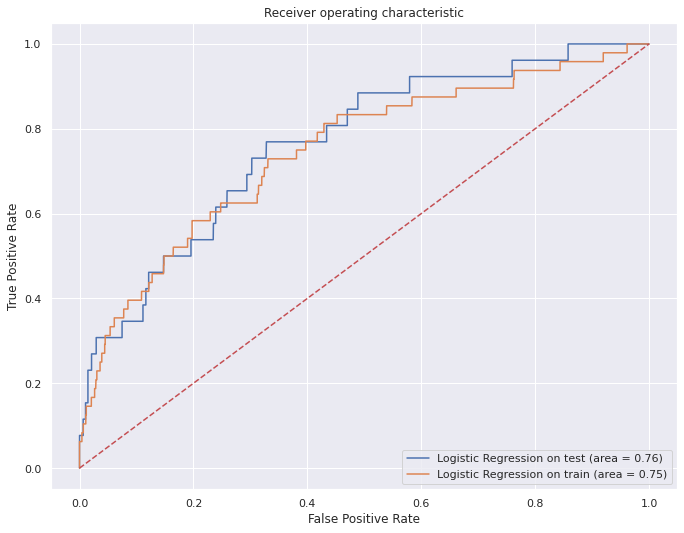

In [81]:
plt.rc("font", size=14)

logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
logit_roc_auc_train = roc_auc_score(y_train, logreg.predict_proba(X_train)[:,1])
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression on test (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr_train, tpr_train, label='Logistic Regression on train (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [82]:
# рассчёт GINI
2*roc_auc_score(y_test, logreg.predict(X_test)) - 1

0.07692307692307687

In [83]:
# рассчёт F1
f1_score(y_test, logreg.predict(X_test), zero_division=1)

0.14285714285714288

In [84]:
# смотрим коэффициенты и биас новой моделич
print(logreg.coef_, logreg.intercept_)

[[-0.05794323 -0.99946375  0.         -0.86408702 -0.71831746 -1.50075122
  -0.1326891  -1.11247434 -0.10473577 -1.29340142 -1.02593025]] [-5.77336413]


Модель изменилась, метрики улучшились


_Опционально, для тех , кто добрался до конца ноутбука_ 😊

ваше впечатление от работы. 
Что было сложно? 
Что было интересно?